# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

###### A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

#### Columns 
##### PatientId: This is the patient uniqueid
##### AppointmentId: This is appointment uniqueid
##### Scheduleday: The date the appointment was scheduled
##### Appoinmentday: The date the patient is asked to come, it could be the same with scheduleday and not
##### Gender: This is either male or female
##### Age: This is the age of the patient
##### Neighbourhood: Place where the appointment take place
##### Scholarship: whether the patient got family allowance ( Bolsa Família) from the Government of Brazil. This is either True or False
##### Hipertension: Whether the patient has hypertension or not, this is either True or False
##### Diabetes: Whether the patient has daibetes or not, this is either True or False
##### Alcoholism: Whether the patient drinks alcohol or not, this is either True or False
##### SMS_received: Whether the patient received SMS or not, this is either True or False
##### Handcap: Whether the patient is handicap or not, this is either True or False
##### No-show: Whether patients show up for their appointment or not, this is either True or False. NO - means they show up, Yes- means they did not show up. This is the dependent variable we want to explore against all other features.

### Question(s) for Analysis

##### What is the percentage of people who showed up or not?
##### What is the proportion of other features in the data such as hypertension?
##### What age range of people showed up most?
##### What percentage of people who received sms showed up?
##### How does gender relate with people showing up or not?

#### Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Read file from link
path = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv'
show_data = pd.read_csv(path)


# show the first 2 rows using dataframe.head() method
print("The first 2 rows of the dataframe\n") 
show_data.head(2)

The first 2 rows of the dataframe



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [3]:
#check for the shape-- no of rows and columns
show_data.shape

(110527, 14)

There are 14 columns and......................................................

In [4]:
#check for correct data type
show_data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

PatientID and AppointmentID are unique identifier, hence not relavent to my analysis, i would drop them.ScheduledDay and Appointment day are also in the wrong data type, i would need to convert them to datetype.

In [5]:
#check for missing values
show_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
#check for duplicated values
show_data.duplicated().any()

False

In [7]:
# check for unique column values
show_data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
# do summary statistics 
show_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The Age column has a minimum of -1 which is odd and the max is 115 also, which seems to be an outlier, deal with this when I want to use the age column


### Data Cleaning

In [9]:
#convert AppointmentID and ScheduleID to date time
show_data['ScheduledDay'] = pd.to_datetime(show_data['ScheduledDay'])
show_data['AppointmentDay'] = pd.to_datetime(show_data['AppointmentDay'])

In [10]:
show_data.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [11]:
#drop the two identifier columns
show_data.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [12]:
# replace columns name with lower case and - to _
show_data.columns=show_data.columns.str.lower().str.replace('-','_')

#rename column "NO-show" to show, hipertension to hypertension
show_data.rename(columns={'no_show':'showcolumn', 'hipertension':'hypertension'},inplace=True)


# replace values in some columns containing 0 and 1 to relatable words
show_data.hypertension= show_data.hypertension.map({0:'no', 1:'yes'})
show_data.diabetes= show_data.diabetes.map({0:'no', 1:'yes'})
show_data.alcoholism = show_data.alcoholism.map({0:'no', 1:'yes'})
show_data.sms_received= show_data.sms_received.map({0:'not-received', 1:'sms-received'})
show_data.scholarship= show_data.scholarship.map({0:'no', 1:'yes'})
show_data.showcolumn= show_data.showcolumn.map({'No':'show', 'Yes':'did-not-show'})

I think my data is clean enough

In [13]:
show_data.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showcolumn
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,no,yes,no,no,0,not-received,show


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Percentage of patient who show up or not?)

Text(0.5,1,'Patient showing up or not')

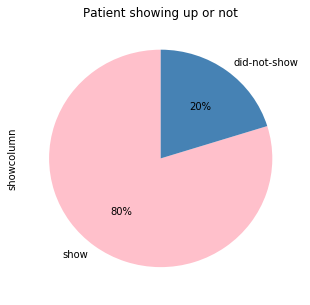

In [14]:
# plotting pie chart for proportion of people who showed up or did not show up
show_data['showcolumn'].value_counts().plot(kind='pie', figsize= (5,5), autopct='%1.0f%%',startangle=90,colors = ['pink', 'steelblue']);
plt.title('Patient showing up or not')

The percentage of patient who showed up is 80%, 20% did not show up

### Research Question 2  (Find the proportion of some other features)

This is important to know if counts is sufficient to make conclusions or percentages is required

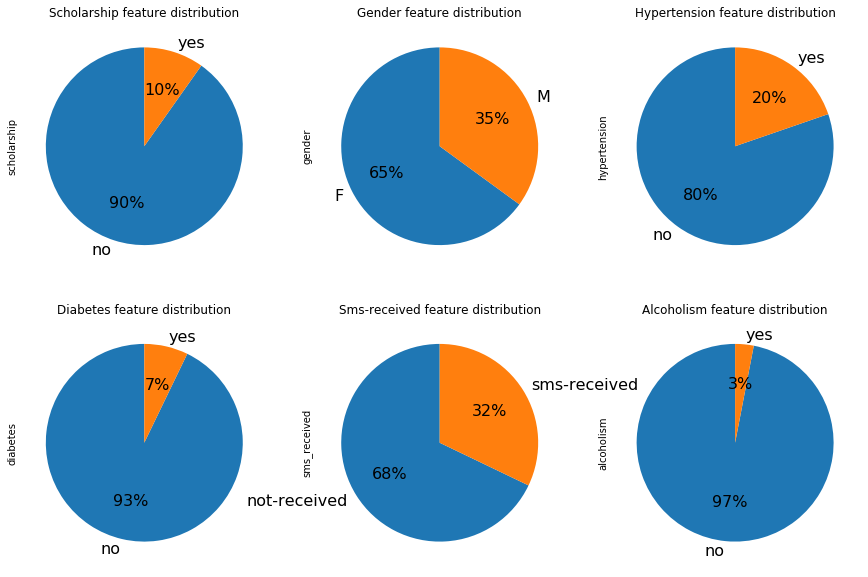

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3)


show_data['scholarship'].value_counts().plot(kind='pie',autopct='%1.0f%%',startangle=90,ax=axes[0,0],fontsize=16);
axes[0,0].set_title('Scholarship feature distribution')
show_data['gender'].value_counts().plot(kind='pie',autopct='%1.0f%%',startangle=90,ax=axes[0,1],fontsize=16);
axes[0,1].set_title('Gender feature distribution')
show_data['hypertension'].value_counts().plot(kind='pie',autopct='%1.0f%%',startangle=90, ax=axes[0,2],fontsize=16);
axes[0,2].set_title('Hypertension feature distribution')
show_data['diabetes'].value_counts().plot(kind='pie', autopct='%1.0f%%',startangle=90,ax=axes[1,0],fontsize=16);
axes[1,0].set_title('Diabetes feature distribution')
show_data['sms_received'].value_counts().plot(kind='pie',autopct='%1.0f%%',startangle=90, ax=axes[1,1],fontsize=16);
axes[1,1].set_title('Sms-received feature distribution')
show_data['alcoholism'].value_counts().plot(kind='pie',autopct='%1.0f%%',startangle=90, ax=axes[1,2], figsize= (15,10),fontsize=16);
axes[1,2].set_title('Alcoholism feature distribution');

The features are highly imbalance, hence counts might not give us sufficent insights, percentage is necessary for good conclusion.

### Research Question 3  (What percentage of male and female showed up or not?)

In [16]:
gender_show = show_data.groupby("gender")['showcolumn'].value_counts()
gender_unstack = gender_show.unstack()

In [17]:
gender_unstack['percent_no_show'] = (gender_unstack['did-not-show']/
                  (gender_unstack['did-not-show']+ gender_unstack['show']))* 100
gender_unstack['show'] = (gender_unstack['show']/
                  (gender_unstack['did-not-show']+ gender_unstack['show']))* 100

In [18]:
gender_unstack

showcolumn,did-not-show,show,percent_no_show
gender,,,
F,14594,79.685412,20.314588
M,7725,80.032052,19.967948


showcolumn  did-not-show  show
gender                        
F                   20.0  80.0
M                   20.0  80.0


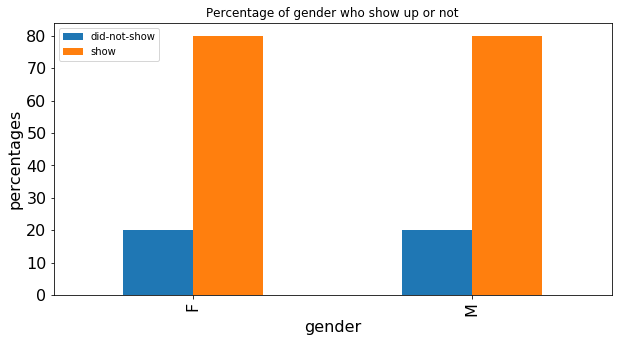

In [19]:
gender_show_percentage = gender_show.groupby(level=0).apply(lambda x:round(100 * x /x.sum())).unstack()
print(gender_show_percentage)
gender_show_percentage.plot(kind="bar", figsize= (10,5),fontsize=16).legend(loc='upper left');
plt.title("Percentage of gender who show up or not")
plt.xlabel('gender',fontsize = 16);
plt.ylabel('percentages',fontsize = 16);

Although, more records of female is in this data, there is no difference in the percentage of male and female who show up or do not show up. 80% of male showup and 80% of female show up

### Research Question 4  (What age range showed up most?)

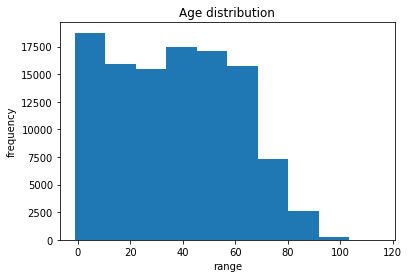

In [21]:
#find the age distribution using histogram
def hist_plot_by(x, title, xlabel, ylabel):
   #A function to draw a histgram 
     ax = plt.subplot(1,1,1)
     ax.hist(x)
     ax.set_title(title)
     ax.set_xlabel(xlabel)
     ax.set_ylabel(ylabel)
     plt.show()
hist_plot_by(show_data['age'], 'Age distribution','range','frequency')

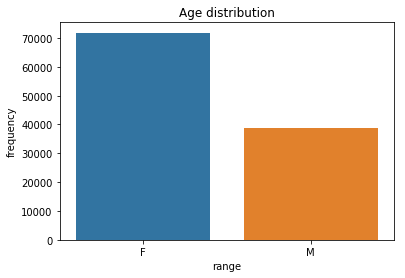

In [23]:
import seaborn as sns
def count_plot(x, title, xlabel, ylabel):
     ax = sns.countplot(x)
     ax.set_title(title)
     ax.set_xlabel(xlabel)
     ax.set_ylabel(ylabel)
     plt.show()
count_plot(show_data['gender'], '............','......','.......')

In [21]:
#query out the row with the negative age
df_negative_age = show_data.query('age < 0') 
df_negative_age

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showcolumn
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,no,no,no,no,0,not-received,show


In [22]:
#drop rows containing negative
show_data.drop(df_negative_age.index, inplace =True)

Although, age above 100 too seems to be outliers, i would just leave it because that age is actually possible within human lifespan

In [23]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0,12,18,25,60,115]
labels = ['children','tenegers','youth','adult','senior']
show_data['agegrouping'] = pd.cut(show_data['age'], bins=bin_edges, labels=labels, right=False)
show_data['agebins'] = pd.cut(show_data['age'], bins=bin_edges,right= False)

show_data.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showcolumn,agegrouping,agebins
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,no,yes,no,no,0,not-received,show,senior,"[60, 115)"


In [24]:
age_show=show_data.groupby("agegrouping")['showcolumn'].value_counts()
age_show.unstack()

showcolumn,did-not-show,show
agegrouping,,
children,4035,15909
tenegers,1962,5473
youth,2469,7419
adult,10611,41475
senior,3239,17929


showcolumn   did-not-show  show
agegrouping                    
children             20.0  80.0
tenegers             26.0  74.0
youth                25.0  75.0
adult                20.0  80.0
senior               15.0  85.0



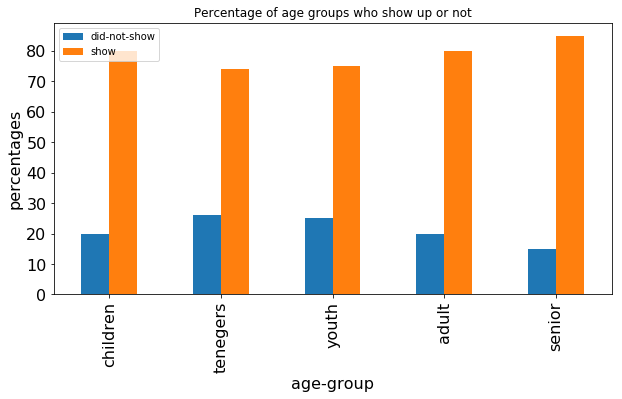

In [25]:
age_show_Percentage = age_show.groupby(level=0).apply(lambda x:round(100 * x /x.sum())).unstack()
print(age_show_Percentage)
print('')
age_show_Percentage.plot(kind="bar", figsize= (10,5),fontsize=16).legend(loc='upper left');
plt.title('Percentage of age groups who show up or not')
plt.xlabel('age-group',fontsize = 16);
plt.ylabel('percentages',fontsize = 16);

### Research Question 5  (What percentage of patients who received SMS showed up?)

In [26]:
sms_show = show_data.groupby("sms_received")['showcolumn'].value_counts()
sms_show.unstack()

showcolumn,did-not-show,show
sms_received,,
not-received,12535,62509
sms-received,9784,25698


showcolumn    did-not-show  show
sms_received                    
not-received          17.0  83.0
sms-received          28.0  72.0



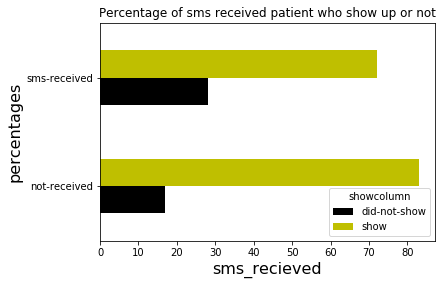

In [27]:
sms_show_percentage = sms_show.groupby(level=0).apply(lambda x: round(100 * x /x.sum())).unstack()
print(sms_show_percentage)
print('')
sms_show_percentage.plot(kind='barh', color=['black', 'y']);# add to subplot 2
plt.title('Percentage of sms received patient who show up or not')
plt.xlabel('sms_recieved',fontsize = 16);
plt.ylabel('percentages',fontsize = 16);

## Conclusion

#### 80% of patient showed up while 20% did not show up in the data given
####  For other categorical features, Finding the proportion  of categories is important for how to best make ones judgement. Counts `would ot give a good picture hence representing in percetages is important
####   There is no difference between male and female who show up. 80% of male showed up, same as female
####  60 years and above (seniors) showed up more (85%)  followed by childern, 0-12 (80%)
####  People who did not receive sms showed up more (83%) than patient who received( 72%). Sms seems not to be effective.

### Limitations

#### The first limitation is that i am limited to the data provided, if more data was provided, i could have gotten more insights
#### The N0-show column before i cleaned it was confusing, I thought Yes -means they showed up and vice versal, but i had to read the description of data again to get the right label meaning.


## References: 

https://sparkbyexamples.com/python/pandas-percentage-total-with-groupby/#:~:text=You%20can%20caluclate%20pandas%20percentage,calculated%20using%20all%20the%20data.

cognitiveclass.ai